In [1]:
import os
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('../datasets/Final_HousePrices.csv')
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,NoAccess,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,NoAccess,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,NoAccess,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,NoAccess,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,NoAccess,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 80)

In [4]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0: 79]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3, random_state=1)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1021, 79), (1021,), (438, 79), (438,))

In [7]:
df_credit_card = pd.read_csv("../datasets/creditcarddefault.csv")
df_credit_card.shape

(30000, 25)

In [8]:
df_credit_card.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
X = df_credit_card.iloc[:, 0: 24]
y = df_credit_card['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y)


In [10]:
print(y_train.value_counts())
print(y_test.value_counts())

print(y_train.value_counts(normalize=True))

print(y_test.value_counts(normalize=True))

0    16355
1     4645
Name: default payment next month, dtype: int64
0    7009
1    1991
Name: default payment next month, dtype: int64
0    0.77881
1    0.22119
Name: default payment next month, dtype: float64
0    0.778778
1    0.221222
Name: default payment next month, dtype: float64


# cross validation


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [12]:
df_auto = pd.read_csv('../datasets/autompg.csv')
df_auto.shape

(398, 9)

In [13]:
df_auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,carname
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [14]:
df_auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
carname         0
dtype: int64

In [15]:
df_auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
carname          object
dtype: object

In [16]:
for col in df_auto.columns:
    if any(df_auto[col].isnull()): print(col)

horsepower


In [17]:
df_auto['horsepower'].fillna(df_auto['horsepower'].median(), inplace=True)

In [18]:
df_auto.drop(['carname'], axis=1, inplace=True)

In [19]:
X = df_auto.iloc[:, 1:8]
y = df_auto.iloc[:, 0]

X = np.array(X)
y = np.array(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3, random_state=1)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((278, 7), (120, 7), (278,), (120,))

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm_model = lm.fit(X_train, y_train)
preds = lm.predict(X_test)

In [23]:
r2score = r2_score(y_test, preds)
mse = mean_squared_error(y_test, preds)

print("Results before cross validation: R^2 {0} MSE {1} ".format(r2score, mse))

Results before cross validation: R^2 0.8472274567567305 MSE 8.932143374072547 


Text(0, 0.5, 'Predicted mpg')

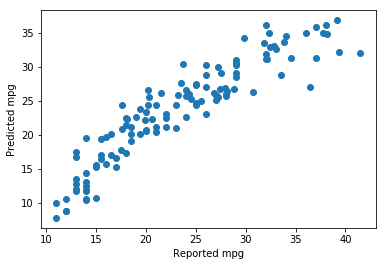

In [24]:
plt.scatter(y_test, preds)
plt.xlabel("Reported mpg")
plt.ylabel("Predicted mpg")

# K-fold cross validation

In [25]:
from sklearn.model_selection import KFold

In [26]:
kfoldcv = KFold(n_splits=10)
kf_ytests = []
kf_preds = []

for train_idx, test_idx in kfoldcv.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # there is only one y test and y pred per iteration over the kfoldcv.split,
    # so we append them to the respective lists
    kf_ytests += list(y_test)
    kf_preds += list(y_pred)

r2score = r2_score(kf_ytests, kf_preds)
mse = mean_squared_error(kf_ytests, kf_preds)


print("Results Kfold cross validation: R^2 {0} MSE {1} ".format(r2score, mse))


Results Kfold cross validation: R^2 0.7891996650092288 MSE 12.845354359352084 


Text(0, 0.5, 'Predicted mpg')

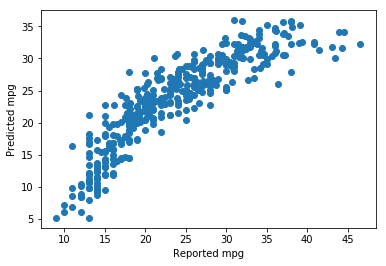

In [27]:
plt.scatter(kf_ytests, kf_preds)
plt.xlabel("Reported mpg")
plt.ylabel("Predicted mpg")

# LOOCV

In [28]:
from sklearn.model_selection import LeaveOneOut

loocv = LeaveOneOut()

loo_ytests = []
loo_preds = []

for train_idx, test_idx in loocv.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    loo_ytests += list(y_test)
    loo_preds += list(y_pred)

r2score = r2_score(loo_ytests, loo_preds)
mse = mean_squared_error(loo_ytests, loo_preds)



print("LOOCV cross validation: R^2 {0} MSE {1} ".format(r2score, mse))

LOOCV cross validation: R^2 0.8123626232113552 MSE 11.433893575239953 


Text(0, 0.5, 'Predicted mpg')

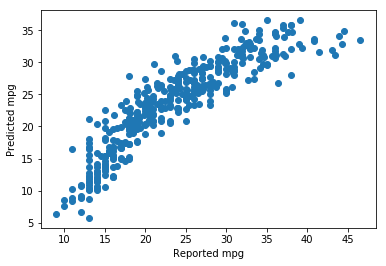

In [29]:
plt.scatter(loo_ytests, loo_preds)
plt.xlabel("Reported mpg")
plt.ylabel("Predicted mpg")

# Bootstrap

In [30]:
from sklearn.linear_model import SGDRegressor
from sklearn.utils import resample

In [31]:
def create_bootstrap_oob(dframe):
    global df_OOB
    global df_bootstrap_sample
    
    # creating bootstrap sample
    df_bootstrap_sample = resample(dframe, replace=True, n_samples=100)
    
    #creating the OOB sample
    bootstrap_sample_index = tuple(df_bootstrap_sample.index)
    bootstrap_df = dframe.index.isin(bootstrap_sample_index)
    df_OOB = dframe[~bootstrap_df]
    
    
    
    

In [32]:
iteration=50
bootstrap_statistics=list()
original_sample_statistics = list()

for i in range(iteration):
    # call custom function
    create_bootstrap_oob(df_auto)
    
    # capture mean value of mpg variable for all bootstrap samples
    bootstrap_statistics.append(df_bootstrap_sample.iloc[:, 0].mean())
    original_sample_statistics.append(df_auto['mpg'].mean())

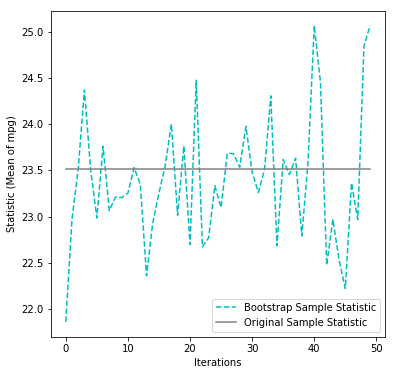

In [33]:

f, ax= plt.subplots(figsize=(6,6))

plt.plot(bootstrap_statistics, 'c--', label='Bootstrap Sample Statistic')
plt.plot(original_sample_statistics, 'grey', label='Original Sample Statistic')
plt.xlabel('Iterations')
plt.ylabel('Statistic (Mean of mpg)')
plt.legend(loc=4)
plt.show()

# Mean Squared Error for Each Bootstrap Iteration

In [34]:
iteration = 50
mse_each_iterations = list()
lm = SGDRegressor()
total_mse = 0
average_mse = list()

for i in range(iteration):
    create_bootstrap_oob(df_auto)
    X_bs = df_bootstrap_sample.iloc[:, 1:8]
    y_bs = df_bootstrap_sample.iloc[:, 0]
    
    X_oob = df_OOB.iloc[:, 1:8] # OOB sample functions
    y_oob = df_OOB.iloc[:, 0] # OOB sample response variable
    
    lm = SGDRegressor()
    lm.fit(X_bs, y_bs)
    
    preds = lm.predict(X_oob)
    
    mse = mean_squared_error(y_oob, preds)
    mse_each_iterations.append(mse)
    
    total_mse += mse
    average_mse.append(total_mse / i)
    

/Users/ashutosh.tiwari1/anaconda2/envs/py35/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


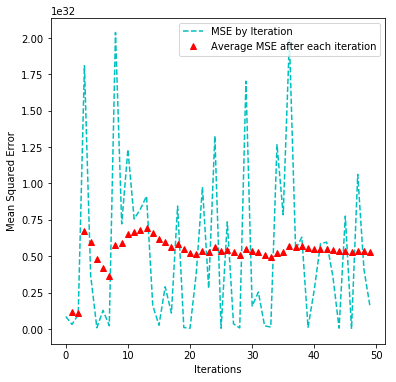

In [35]:
f, ax= plt.subplots(figsize=(6,6))

plt.plot(mse_each_iterations, 'c--', label='MSE by Iteration')
plt.plot(average_mse, 'r^', label='Average MSE after each iteration')

plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend(loc=1)
plt.show()